## Image Processing

##INT3404 1 / INT3404E 21
## Diep Ng., Ph.D.

### Mail-to: ngocdiep at vnu.edu.vn



In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


# Tuần 4: Phép lọc (Filters)


Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html

- `mode`: str {‘full’, ‘valid’, ‘same’}, optional
             A string indicating the size of the output:

            + full
                The output is the full discrete linear cross-correlation of the inputs. (Default)

            + valid
                The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.

            + same
                The output is the same size as in1, centered with respect to the ‘full’ output.

- `boundary` : str {‘fill’, ‘wrap’, ‘symm’}, optional
                A flag indicating how to handle boundaries:

            + fill
                pad input arrays with fillvalue. (default)

            + wrap
                circular boundary conditions.

            + symm
                symmetrical boundary conditions.

- `fillvalue` : scalar, optional
                Value to fill pad input arrays with. Default is 0.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]

(-0.5, 181.5, 247.5, -0.5)

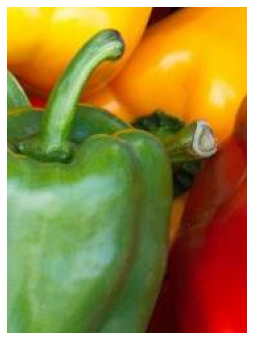

In [4]:
image = cv2.imread("pepper.jpg")
plt.imshow(image[...,::-1])
plt.axis("off")

In [6]:
def rgb_filter(image, kernel, mode='full', boundary='fill'):
    b,g,r = cv2.split(image)
    b = signal.correlate2d(b, kernel, mode=mode, boundary=boundary)
    g = signal.correlate2d(g, kernel, mode=mode, boundary=boundary)
    r = signal.correlate2d(r, kernel, mode=mode, boundary=boundary)
    output = cv2.merge([b,g,r])
    return output


Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

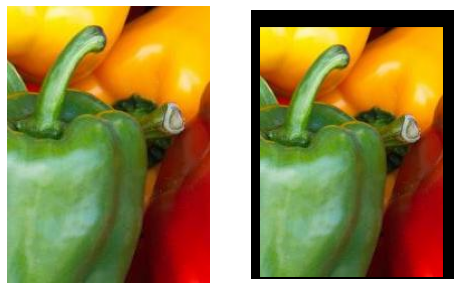

In [14]:
# make a kernel
kernel = np.zeros((21, 21), dtype='uint8')
kernel[2,11] = 1

# MxN, mxn,
#FUll: M+m-1 = 248 +21 -1
#do cross correlation
fimage = rgb_filter(image, kernel, mode='full', boundary='fill')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

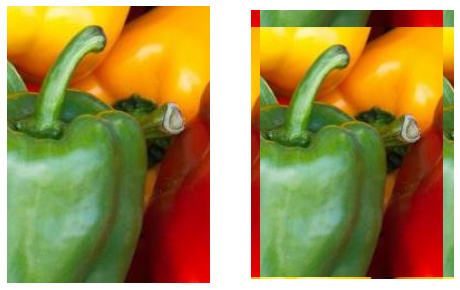

In [15]:
#do cross correlation
fimage = rgb_filter(image, kernel, mode='full', boundary='wrap')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

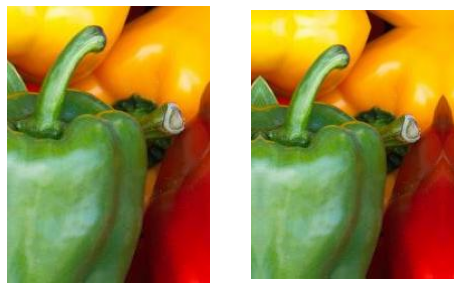

In [16]:
#symmetry boundary
fimage = rgb_filter(image, kernel, mode='full', boundary='symm')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (228, 162, 3)


(-0.5, 161.5, 227.5, -0.5)

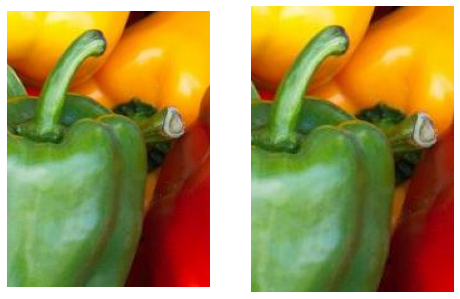

In [17]:
#valid filtering
fimage = rgb_filter(image, kernel, mode='valid', boundary='symm')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##should decrease

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(-0.5, 181.5, 247.5, -0.5)

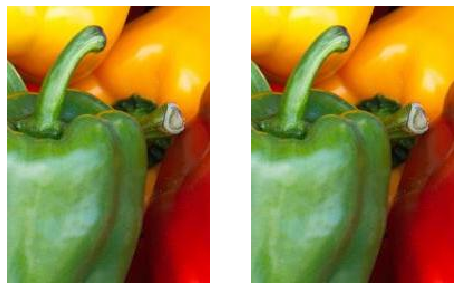

In [51]:
#same filtering
fimage = rgb_filter(image, kernel, mode='same', boundary='symm')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##equal

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Using opencv


In [21]:
cv2.filter2D?

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(-0.5, 181.5, 247.5, -0.5)

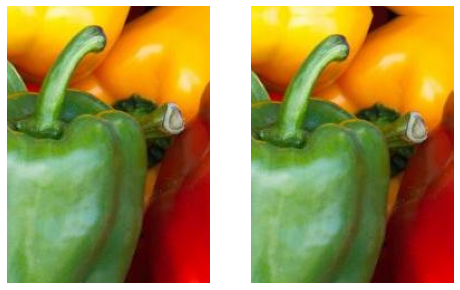

In [22]:
fimage = cv2.filter2D(image, -1, kernel, cv2.BORDER_DEFAULT)

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##should decrease

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Averaging

(-0.5, 181.5, 247.5, -0.5)

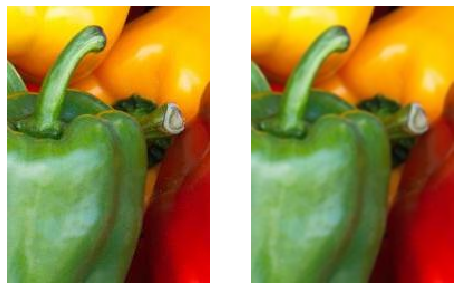

In [65]:
kernel = 1/9 * np.array([
                [1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]
])

#averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Gaussian Filtering

(-0.5, 181.5, 247.5, -0.5)

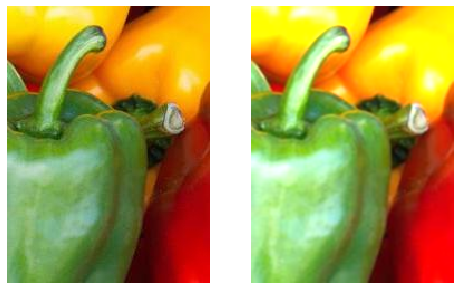

In [66]:
#a gaussian kernel

kernel = 1/12 * np.array([
                [1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]
])

#averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

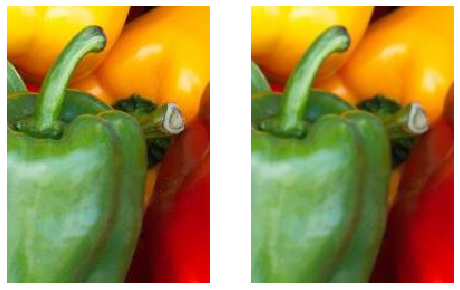

In [68]:
#or using GaussianBlur

fimage = cv2.GaussianBlur(image, (3,3), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

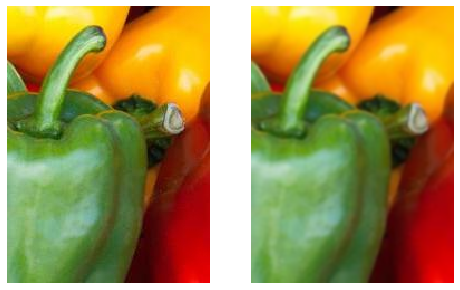

In [71]:
fimage = cv2.GaussianBlur(image, (5, 5), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

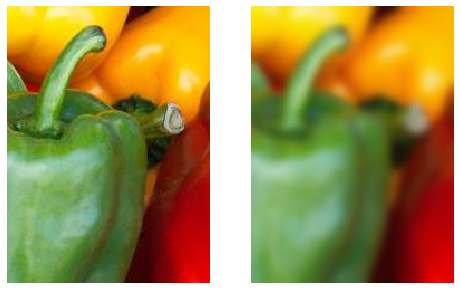

In [76]:
fimage = cv2.GaussianBlur(image, (21,21), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

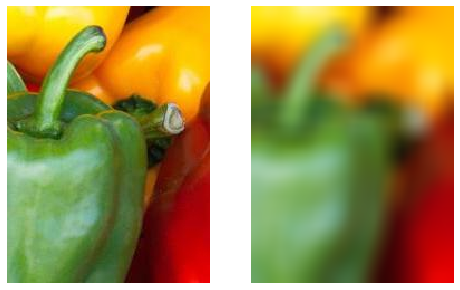

In [77]:
fimage = cv2.GaussianBlur(image, (21, 21), 20) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Median filtering


(-0.5, 181.5, 247.5, -0.5)

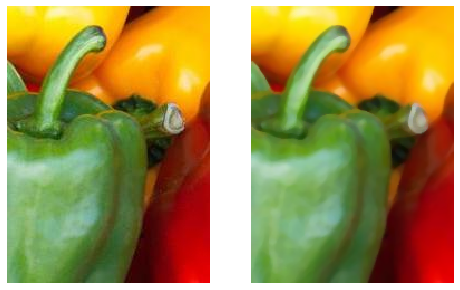

In [78]:
fimage = cv2.medianBlur(image, 5) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

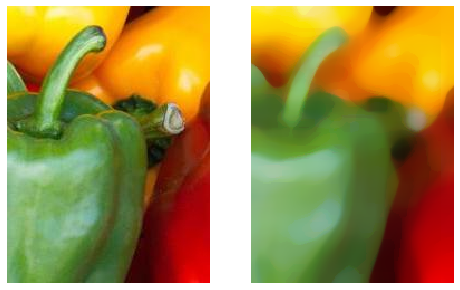

In [80]:
fimage = cv2.medianBlur(image, 21) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

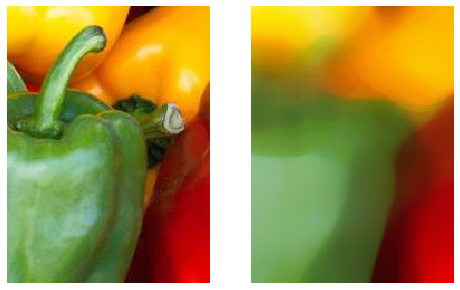

In [81]:
fimage = cv2.medianBlur(image, 45) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

## Unsharp masking

$dst = \alpha \cdot src1 + \beta \cdot src2 + \gamma$

Where `src2` is a blurred image

Text(0.5, 1.0, 'sharpen')

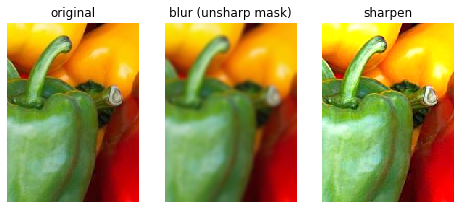

In [99]:
blur = cv2.GaussianBlur(image, (7,7), 3.0)
fimage = cv2.addWeighted(image, 1.7, blur, -0.5, 0)
plt.subplot(1, 3, 1); plt.imshow(image[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen")

Text(0.5, 1.0, 'sharpen')

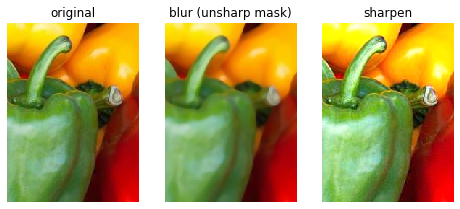

In [100]:
blur = cv2.medianBlur(image, 7)
fimage = cv2.addWeighted(image, 1.7, blur, -0.5, 0)
plt.subplot(1, 3, 1); plt.imshow(image[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen")

## Arbitrary filters


(-0.5, 181.5, 247.5, -0.5)

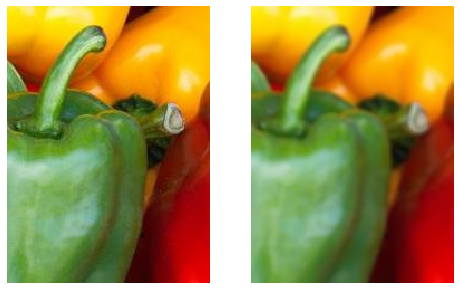

In [113]:
#a gaussian kernel

kernel = np.random.rand(5,5)
kernel = kernel/sum(kernel.ravel())

#averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

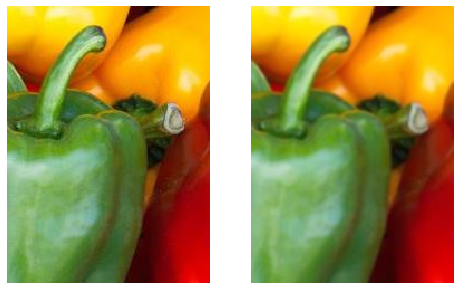

In [114]:
fimage = cv2.GaussianBlur(image, (5,5), 1.0, cv2.BORDER_REFLECT)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


Bonus point tasks:
- (0.5pt midterm): Prove properties of Convolution operation
- (0.5pt midterm): Describe fast computation (efficient implementation) for convolution (on CPU, on GPU)